In [1]:
!pip install q keras==2.4.3
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")
!pip install tensorflow

Mounted at /content/gdrive


In [3]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

In [4]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set_theme(style="darkgrid")
train = pd.read_csv('/content/gdrive/My Drive/sign_mnist_train.csv') 
test = pd.read_csv('/content/gdrive/My Drive/sign_mnist_test.csv')


labels = train['label'].values
images = train.drop('label', axis=1)
images = images.values
images = np.array([np.reshape(i, (28,28)) for i in images])
# convert 28x28 array into a 1d array of size 784
images = np.array([i.flatten() for i in images])
labels.shape
# test.shape
# train

(27455,)

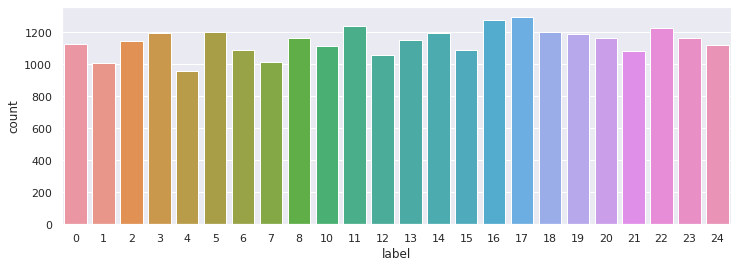

In [5]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,4)})
ax = sns.countplot(x="label", data=train)
# train
# reveal the underlying distribution of the data


In [11]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,166.685522,167.811983,168.495647,169.310872,169.956948,170.460463,170.716518,170.872701,170.808887,170.481442,169.979749,169.264506,168.144127,166.936660,165.765944,163.620725,161.933600,161.349117,147.146858,150.284502,152.941978,155.415043,158.068986,160.229576,162.345802,164.291167,165.736332,166.991732,168.503187,...,131.949918,134.583755,139.361974,148.115862,155.095465,160.346858,163.915607,165.364414,165.911273,165.182080,164.407977,163.488254,143.407758,144.189474,145.711637,147.660718,149.019414,148.670843,148.185212,147.298926,146.286323,144.027062,142.966017,139.769550,137.071572,135.277181,131.922783,130.232235,132.046367,135.289237,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,30.558445,29.771007,29.329251,28.620248,27.961255,27.053544,26.763535,26.307419,26.088459,26.475963,26.940885,27.871515,29.368386,30.906718,31.902723,34.303747,35.991306,36.571064,41.555429,40.094304,39.427215,38.686176,37.242459,36.373576,35.242915,33.899171,32.759395,31.656140,30.833853,...,57.586028,60.373218,63.301768,63.300608,63.511566,62.551522,61.833119,62.210750,62.163516,61.958245,61.950177,62.403709,54.406116,53.658786,54.710497,54.613724,54.351761,55.233710,55.904715,57.155523,57.965677,57.393379,56.689603,56.118823,54.680900,55.278778,56.384076,58.111783,59.204300,62.553694,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size = 0.3, random_state = 99)

# # add bias
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)


# x_train = x_train.reshape(-1, 28, 28, 1)
# x_val = x_val.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

# Normalize the data
x_train = x_train / 255
x_val = x_val / 255

n_classes = 26

y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)


print(x_train.shape)

(19218, 28, 28, 1)


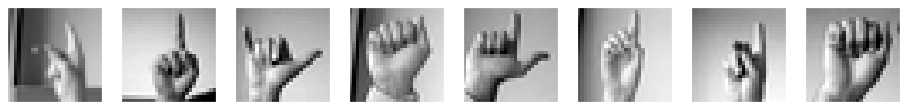

In [7]:
# Let's take a look at the images
plt.figure(figsize=(16, 4))
for i in range(8):
    ax = plt.subplot(2, 8, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [8]:
len(set(labels))

24

In [9]:
# Training
# Batch size, number of classes and number of epochs
batch_size = 128
epochs = 10

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((19218, 28, 28, 1), (19218, 26), (8237, 28, 28, 1), (8237, 26))

In [153]:
# CNN
# pooling layers, reduces the size of the convolution output, reduce # of parameters to optimize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# model = Sequential()
# model.add(Conv2D(125, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Conv2D(75, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Conv2D(50, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Flatten())
# model.add(Dense(25, activation ='relu'))
# model.add(Dropout(0.20))

# model.add(Dense(n_classes, activation = 'softmax'))

# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model = Sequential()
model.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape = (28,28,1)))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128 , (3,3), activation = 'relu'))
model.add(Dropout(0.2))

# model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256 , (3,3) , activation = 'relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(512 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = n_classes , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
# training the model for 10 epochs
history1 = model.fit(x_train, y_train, batch_size = 128 ,epochs = 10 , validation_data= (x_val,y_val))
# model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_val, y_val))



Epoch 1/10
151/151 [==============================] - 53s 354ms/step - loss: 2.0997 - accuracy: 0.3493 - val_loss: 0.9048 - val_accuracy: 0.7478
Epoch 2/10
151/151 [==============================] - 53s 351ms/step - loss: 0.6263 - accuracy: 0.7885 - val_loss: 0.3331 - val_accuracy: 0.9087
Epoch 3/10
151/151 [==============================] - 53s 351ms/step - loss: 0.2666 - accuracy: 0.9124 - val_loss: 0.1806 - val_accuracy: 0.9554
Epoch 4/10
151/151 [==============================] - 53s 354ms/step - loss: 0.1190 - accuracy: 0.9647 - val_loss: 0.0656 - val_accuracy: 0.9885
Epoch 5/10
151/151 [==============================] - 53s 352ms/step - loss: 0.0543 - accuracy: 0.9867 - val_loss: 0.0259 - val_accuracy: 0.9989
Epoch 6/10
151/151 [==============================] - 57s 379ms/step - loss: 0.0330 - accuracy: 0.9921 - val_loss: 0.0342 - val_accuracy: 0.9934
Epoch 7/10
151/151 [==============================] - 53s 351ms/step - loss: 0.0223 - accuracy: 0.9944 - val_loss: 0.0083 - val_ac

In [25]:
# Maybe try different activation functions
# new dataset so words instead of letters

In [154]:
testing = pd.read_csv('/content/gdrive/My Drive/sign_mnist_test.csv')
testing_labels = testing['label'].values
testing = testing.drop('label', axis=1)
testing = testing.values
print(testing.shape)


testing = np.array([np.reshape(i, (28,28)) for i in testing])
print(testing.shape)
# convert 28x28 array into a 1d array of size 784
testing = np.array([i.flatten() for i in testing])
print(testing.shape)

(7172, 784)
(7172, 28, 28)
(7172, 784)


In [155]:
# add bias
x_testing = testing.reshape(testing.shape[0], 28, 28, 1)
x_testing = x_testing.astype('float32')

# Normalize the data
x_testing = x_testing / 255


y_test = np_utils.to_categorical(testing_labels, n_classes)
x_testing.shape

(7172, 28, 28, 1)

In [156]:
print("Accuracy of the model is - " , model.evaluate(x_testing,y_test)[1]*100 , "%")

225/225 [==============================] - 4s 19ms/step - loss: 0.3303 - accuracy: 0.9112
Accuracy of the model is -  91.11824035644531 %


In [157]:
# convert to 1-26
y_pred = model.predict(x_testing)
yy = []
for i in range(len(y_pred)):
  yy.append(np.argmax(y_pred[i]))


In [74]:
# Before using VGG16 architecture 0.8353318460680423
accuracy_score(testing_labels, yy)

0.8353318460680423

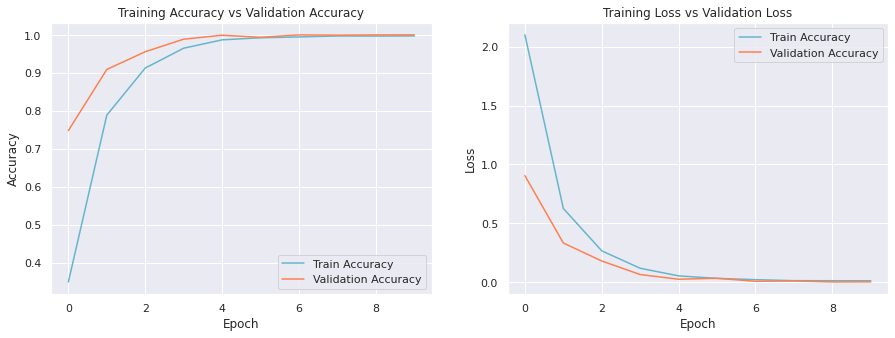

In [164]:
fig , subb = plt.subplots(1,2)
t_acc = history1.history['accuracy']
t_loss = history1.history['loss']
fig.set_size_inches(15,5)

subb[0].set_title('Training Accuracy vs Validation Accuracy')
subb[1].set_title('Training Loss vs Validation Loss')

subb[0].set_ylabel('Accuracy')
subb[1].set_ylabel('Loss')
subb[0].set_xlabel('Epoch')
subb[1].set_xlabel('Epoch')


subb[0].plot(history1.history['accuracy'], color = 'c', label = 'Train Accuracy')
subb[0].plot(history1.history['val_accuracy'], color = 'coral', label = 'Validation Accuracy')

subb[1].plot(history1.history['loss'], color = 'c', label = 'Train Accuracy')
subb[1].plot(history1.history['val_loss'], color = 'coral', label = 'Validation Accuracy')

# legend
subb[0].legend(loc='lower right')
subb[1].legend( loc='upper right')

plt.show()


Try Data Augmentation


In [31]:
from keras.preprocessing.image import ImageDataGenerator as imgen
# data augmentation
datagen = imgen(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=30,  # randomly rotate images in the range 15 degrees
        zoom_range = 0.1, # Randomly zoom image 5%
        width_shift_range=0.15,  # randomly shift images horizontally 15%
        height_shift_range=0.15,  # randomly shift images vertically 15%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [170]:
model2 = Sequential()
model2.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape = (28,28,1)))

model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128 , (3,3), activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(256 , (3,3) , activation = 'relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = n_classes , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

history2 = model2.fit_generator(datagen.flow(x_train,y_train, batch_size=128),epochs = 20, validation_data = (x_val,y_val))

Epoch 1/20
151/151 [==============================] - 57s 380ms/step - loss: 3.1053 - accuracy: 0.0720 - val_loss: 2.6859 - val_accuracy: 0.1718
Epoch 2/20
151/151 [==============================] - 58s 384ms/step - loss: 2.4045 - accuracy: 0.2369 - val_loss: 1.7121 - val_accuracy: 0.4277
Epoch 3/20
151/151 [==============================] - 58s 383ms/step - loss: 1.8210 - accuracy: 0.3927 - val_loss: 1.2453 - val_accuracy: 0.5796
Epoch 4/20
151/151 [==============================] - 58s 383ms/step - loss: 1.4904 - accuracy: 0.4977 - val_loss: 0.9981 - val_accuracy: 0.6784
Epoch 5/20
151/151 [==============================] - 58s 381ms/step - loss: 1.2724 - accuracy: 0.5678 - val_loss: 0.7916 - val_accuracy: 0.7703
Epoch 6/20
151/151 [==============================] - 58s 384ms/step - loss: 1.1014 - accuracy: 0.6249 - val_loss: 0.6737 - val_accuracy: 0.7860
Epoch 7/20
151/151 [==============================] - 58s 386ms/step - loss: 0.9647 - accuracy: 0.6671 - val_loss: 0.5822 - val_ac

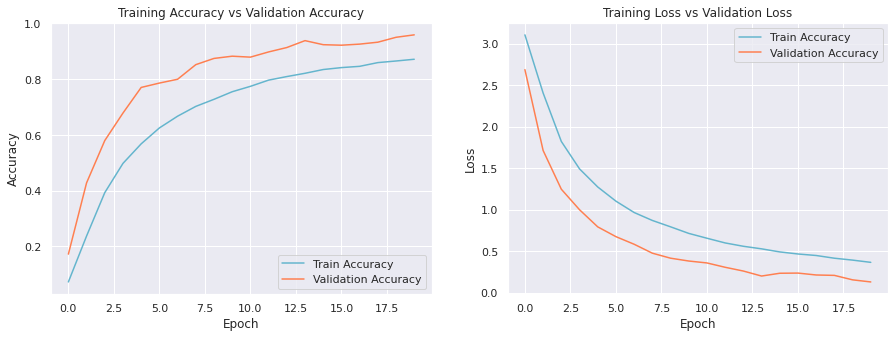

In [171]:
fig2 , subb2 = plt.subplots(1,2)
t_acc = history2.history['accuracy']
t_loss = history2.history['loss']
fig2.set_size_inches(15,5)

subb2[0].set_title('Training Accuracy vs Validation Accuracy')
subb2[1].set_title('Training Loss vs Validation Loss')

subb2[0].set_ylabel('Accuracy')
subb2[1].set_ylabel('Loss')
subb2[0].set_xlabel('Epoch')
subb2[1].set_xlabel('Epoch')


subb2[0].plot(history2.history['accuracy'], color = 'c', label = 'Train Accuracy')
subb2[0].plot(history2.history['val_accuracy'], color = 'coral', label = 'Validation Accuracy')

subb2[1].plot(history2.history['loss'], color = 'c', label = 'Train Accuracy')
subb2[1].plot(history2.history['val_loss'], color = 'coral', label = 'Validation Accuracy')

# legend
subb2[0].legend(loc='lower right')
subb2[1].legend( loc='upper right')

plt.show()


In [172]:
# convert to 1-26
y_pred2 = model2.predict(x_testing)
yy2 = []
for i in range(len(y_pred2)):
  yy2.append(np.argmax(y_pred2[i]))


In [173]:
print("Accuracy of the model is - " , model2.evaluate(x_testing,y_test)[1]*100 , "%") # 20 epochs

225/225 [==============================] - 4s 20ms/step - loss: 0.1840 - accuracy: 0.9479
Accuracy of the model is -  94.78527903556824 %


In [174]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = []
for i in range(len(y_test)):
  y_true.append(np.argmax(y_test[i]))

yy2 = np.array(yy2)
y_test = np.array(y_test)
# yy2.shape, y_test.shape, len(y_test)

cm = confusion_matrix(y_true, yy2 )
# cm

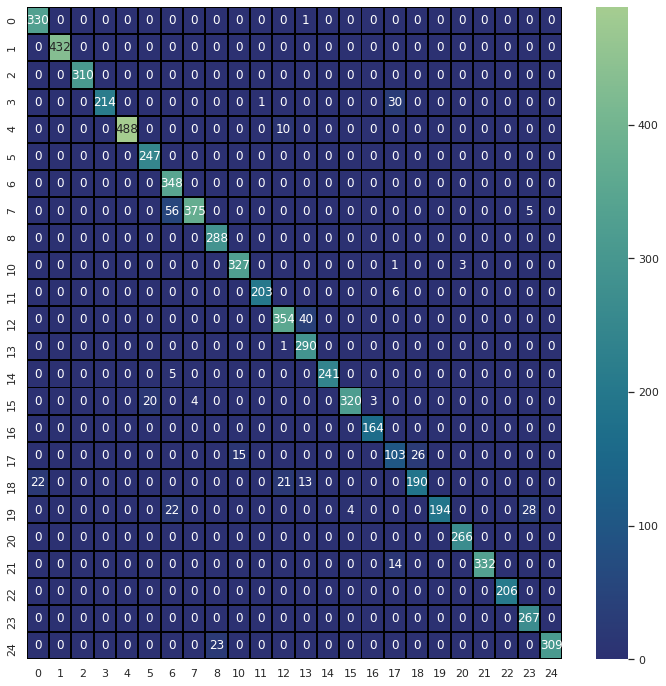

In [175]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (12,12))
sns.heatmap(cm,cmap= "crest_r", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

TESTING with webcam


In [67]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


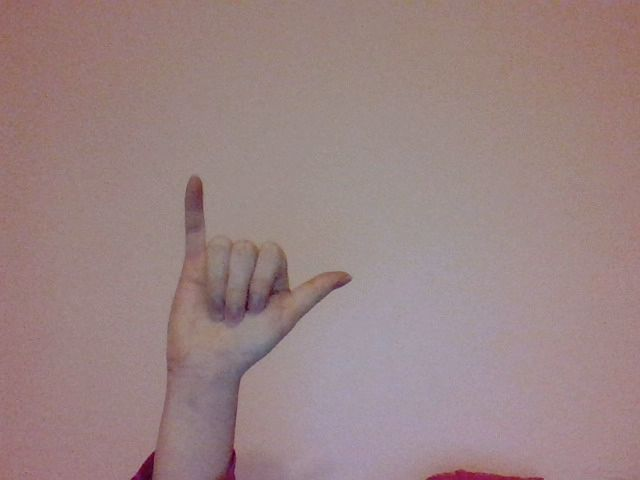

In [144]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

(480, 640, 3)
(28, 28, 3)


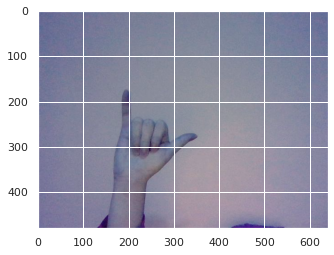

In [145]:
import cv2
ii = cv2.imread('photo.jpg')
print(ii.shape)
image = cv2.resize(cv2.imread('photo.jpg'), (28,28))
plt.imshow(ii)
# plt.gray()
print(image.shape)
plt.show()

In [146]:
# image = np.array(image, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.array(image.flatten())
print(image.shape)

(2352,)


In [147]:
gray.shape

(28, 28)

In [148]:
# convert 28x28 array into a 1d array of size 784
gray = np.array(gray.flatten())
print(gray.shape)

(784,)


In [149]:
# add bias
# grey = gray.reshape(1, 28, 28, 1)
grey = gray.reshape(1, 28, 28, 1)
grey = grey.astype('float32')

# Normalize the data
grey = grey / 255
grey.shape

(1, 28, 28, 1)

In [150]:
y_pred1 = model.predict(grey)
y_pred2 = model2.predict(grey)

In [151]:
num_to_let = {
    0:'a',1: 'b', 2: 'c', 3:'d' , 4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',12:'m',13:'n',14:'o',
    15:'p',16:'q',17:'r',18:'s',19:'t',20:'u',21:'v',22:'w',23:'x',24:'y',25:'z'
}
print("model 1 predicted:" , num_to_let[np.argmax(y_pred1)])
print("model 2 predicted:" , num_to_let[np.argmax(y_pred2)])

model 1 predicted: l
model 2 predicted: y


Visualizing the Filters

In [218]:
model_weights = []

for layer in model2.layers:
  if 'conv' not in layer.name:
    continue
	# get filter weights
  filters, biases = layer.get_weights()
  model_weights.append(filter)
 
# filters, biases = model2.layers[2].get_weights()
# filters
len(model_weights)

3

In [219]:
# normalize filter values to 0-1 so we can visualize them
f_min = filters.min()
f_max = filters.max()
filters = (filters - f_min) / (f_max - f_min)

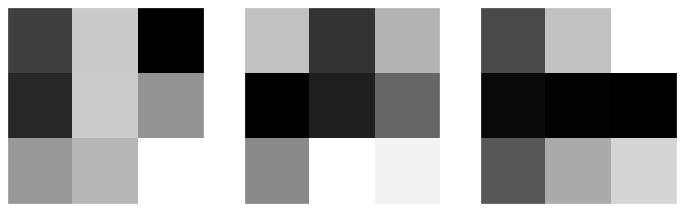

In [220]:
n_filters, ix = 1, 1
f = filters[:, :, :, 1]
for j in range(3):
  ax = plt.subplot(n_filters, 3, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.imshow(f[:, :, j], cmap='gray')
  ix += 1
plt.show()

In [188]:
# model11 = model2(inputs=model2.inputs, outputs=model2.layers[1].output)

In [230]:
# from torchvision import models, transforms
# transform = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize((512, 512)),
#     transforms.ToTensor(),
# ])


# image = np.array(image)
# # apply the transforms
# image = transform(image)
# print(image.size())
# # unsqueeze to add a batch dimension
# image = image.unsqueeze(0)
# print(image.size())